#### Importing packages

In [1]:
import math
import networkx 
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as alg
from scipy.linalg import block_diag

Below is the spectral clustering method, using the adjacency matrix of the orignal graph and the complement graph

## Loading dataset

In [2]:
A=nx.read_weighted_edgelist('Stony.txt') 
#remove all loops
A.remove_edges_from(list(nx.selfloop_edges(A)))

### Getting the adjacency matrix

In [3]:
A1=nx.to_numpy_matrix(A)
print(A1)
#GA = nx.from_numpy_matrix(A1)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Partitioning the network using spectral clustering, using most -ve eigenvalue of the original adjacency matrix,

In [16]:
#we take the communities from the Adjacency matrix
def divideqwerty(A,G,r=0):#step 1: we define r here
    """Function to divide a Network into two subgraphs
    using the Fiedler's theorem
    """
    #take the eig of A
    a,v=np.linalg.eig(A)
    
    #step 2, getting the eigenvector of the most negative eigenvalue of adjacency matrix
    max_eig=sorted(a)[0]
    ind=0
    for i in range(len(a)):
        if a[i]==max_eig:
            ind=i
    vf=np.asarray(v[:,ind]).reshape(-1)
    fv={}
    for k,nodes in enumerate(G.nodes):
        fv[nodes]=vf[k]
    
    #step 3, Assigning the empty lists, to separate pos and negative vectors
    Sub1=[]
    Sub2=[]
    
    #step 4
    for nodes in G.nodes: # Looping through, to separate negative and pos, the append them in different list
        if fv[nodes]>=r: # checking if vector is greater or equal to zero, then if it is, it means it is positive
            Sub1.append(nodes) # append the positive ones in Sub1 list
        else:
            Sub2.append(nodes) # append the negative ones, in sub2 list, from fiedlervector
    Graph1=G.subgraph(Sub1) # Assign the Positive ones from the fiedler, to Graph1
    Graph2=G.subgraph(Sub2) # Assign the Negative ones from the fiedler, to Graph2
    
    
    return Graph1 , Graph2

In [17]:
#anti- community from the adjacency matrix of Adj_T
GGraph1,GGraph2=divideqwerty(B1,B)

## Computing the modularity After partitioning the graph

For the modularity we need the partition, so "divideqwerty(A1,A)" is the partition of the network, and "A" is the network or the graph.

### Modularity of stony network

In [18]:
nx_comm.modularity(A, divideqwerty(A1,A))

-0.47245246044418643

### Modularity of Transcription Yeast network 

In [19]:
nx_comm.modularity(B, divideqwerty(B1,B))

-0.41297909994644644

### Modularity of Canton network

In [20]:
nx_comm.modularity(C, divideqwerty(C1,C))

-0.47320690848636293

### visualising the network after partitioning it.

In [21]:
def visualisee(G,G1,G2):
    """Visualise the network after splitting it 
    """
    
    plt.figure(figsize=(20,15)) # Defining the size of the plot
    col=[] # empty list for color
    size=[] # empty list for the size of the plot
    for nodes in G.nodes:
        if nodes in G1.nodes:
            col.append('r') # Appending the color red to the positive vectors, found in fiedler vector
            size.append(300)
        else:
            col.append('cyan')  # Highlighting the nodes with the negative vector in the fiedler vector, by light green
            size.append(300)
    nx.draw_networkx(G,node_color=col,node_size=size,alpha=0.7)
    plt.show()

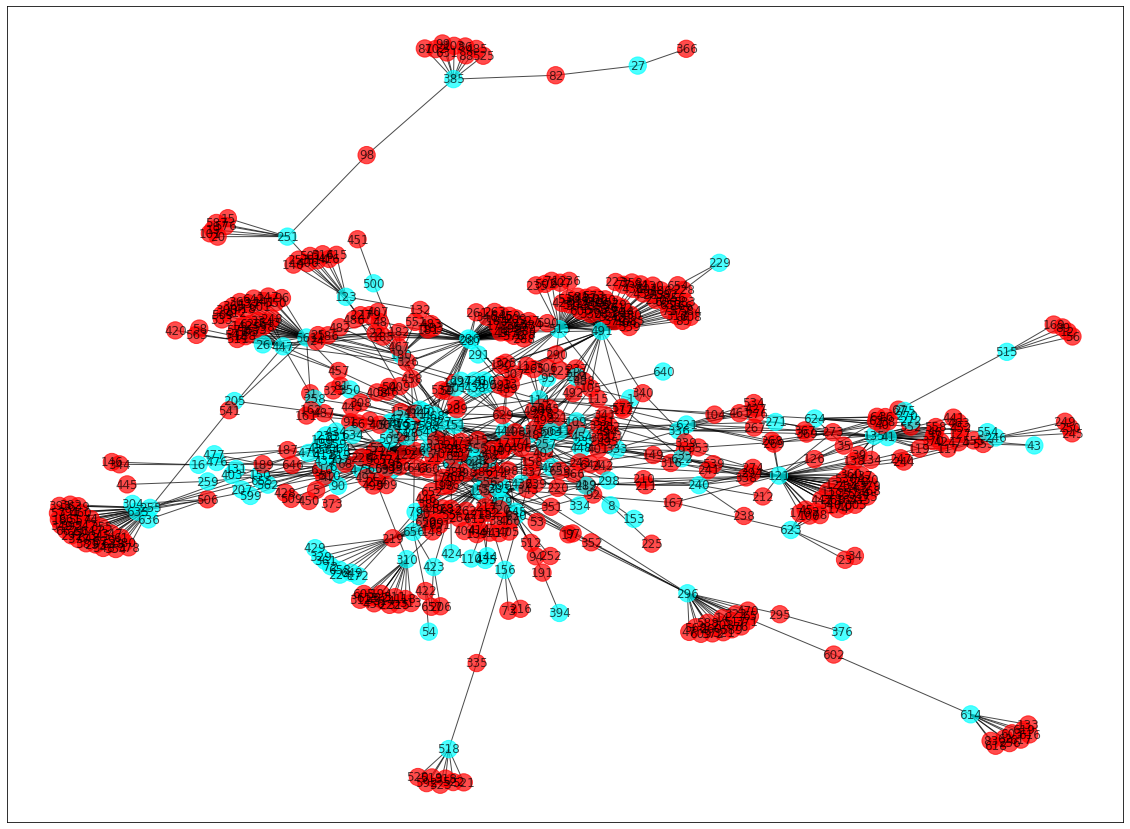

In [22]:
visualisee(B,GGraph1,GGraph2)

## Complement matrix of adjacency marix A1

For the complement we will be trying different algorithms for anti-community detection

In [23]:
H=np.ones((len(A1),len(A1)))-np.identity(len(A1))-A1
print(H)

[[0. 0. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


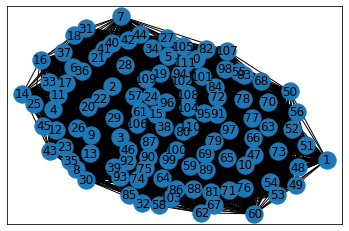

In [24]:
v = nx.convert_matrix.from_numpy_matrix(H)
nx.draw_networkx(v)

### calculate the graph Simple Laplacian L=D-A  of adjacency marix A1

In [25]:
n2=len(v)
e2=np.ones((n2,1))
D2=np.diag(np.asarray(np.dot(H,e2)).reshape(-1))
L2=D2-H
print(L2)

[[108.   0.  -1. ...  -1.  -1.  -1.]
 [  0.  66.   0. ...  -1.  -1.  -1.]
 [ -1.   0. 100. ...  -1.  -1.  -1.]
 ...
 [ -1.  -1.  -1. ... 109.  -1.  -1.]
 [ -1.  -1.  -1. ...  -1. 110.  -1.]
 [ -1.  -1.  -1. ...  -1.  -1. 107.]]


### finding the eigenvector, associated with the smallest nontrivial eigenvalue of the graph laplacian

In [26]:
def fied_vect2(L,G):
    """Function to find the fiedler vector from the Laplacian Matrix
    """
    eigenval,eigenvec = np.linalg.eig(L)#eigenvalues and eigenvctor of the laplacian
    
    #take the second smallest eigenvalues
    lamda=sorted(eigenval)[1]
    index=0 #our index
    for i in range(len(eigenval)):
        if eigenval[i]==lamda:
            index=i
    fied=np.asarray(eigenvec[:,index]).reshape(-1)#fiedler vector
    
    #associate it with the nodes of G
    FV={}
    i=0
    for nodes in G.nodes:
        FV[nodes]=fied[i]
        i+=1
        
    return FV

In [27]:
fied_vect2(L2,A)

{'3': -0.005752450775826134,
 '1': 0.5330187103590796,
 '4': -0.04763289428183724,
 '5': -0.012059398485954808,
 '6': -0.1288570718173414,
 '7': 0.0006218828430933582,
 '8': -0.1267169809825315,
 '9': -0.11464425764068047,
 '10': -0.0626360117668233,
 '11': -0.062166204010337796,
 '16': 0.04811337791623453,
 '74': -0.1310559682987672,
 '75': -0.1033235067368175,
 '76': -0.06583472172330883,
 '77': -0.21633167802036943,
 '78': -0.00972286804039596,
 '79': -0.1995926964446527,
 '81': -0.09064926308966036,
 '82': -0.15235528738277807,
 '83': -0.010572432989057598,
 '84': -0.06275991610994638,
 '85': -0.08784621476978723,
 '86': -0.062421228281904315,
 '87': -0.09252470483277993,
 '88': -0.010572432989057605,
 '89': -0.1619839316121947,
 '90': -0.07403567901368377,
 '92': -0.043381262638590365,
 '93': -0.048685655325938736,
 '94': -0.02441505270925981,
 '95': -0.07066741965047622,
 '96': -0.13805316717855073,
 '97': 0.004833937962828758,
 '98': -0.12284808935125409,
 '99': -0.0464305346127

### dividing the network into two subgraphs

In [28]:
def divide2(L,G,r=0):#step 1: we define r here
    """Function to divide a Network into two subgraphs
    using the Fiedler's theorem
    """
    
    #step 2
    fv=fied_vect2(L,G) # assigning the vectors from the fiedlervector
    
    #step 3, Assigning the empty lists, to separate pos and negative vectors
    Sub1=[]
    Sub2=[]
    
    #step 4
    for nodes in G.nodes: # Looping through, to separate negative and pos, the append them in different list
        if fv[nodes]>=r: # checking if vector is greater or equal to zero, then if it is, it means it is positive
            Sub1.append(nodes) # append the positive ones in Sub1 list
        else:
            Sub2.append(nodes) # append the negative ones, in sub2 list, from fiedlervector
    Graph1=G.subgraph(Sub1) # Assign the Positive ones from the fiedler, to Graph1
    Graph2=G.subgraph(Sub2) # Assign the Negative ones from the fiedler, to Graph2
    
    
    return Graph1 , Graph2

In [29]:
#Divide the network A 
G112,G122=divide2(L2,A)

## Computing the modularity After partitioning the graph

The modularity function require the graph and the partition of that graph, therefore, the grapg is "A" and divide2(L2,A) is the partition of graph A.

In [30]:
nx_comm.modularity(A, divide2(L2,A))

-0.4710959500653215

### visualising the network after partitioning it.

In [31]:
def visualisee(G,G1,G2):
    """Visualise the network after splitting it 
    """
    
    plt.figure(figsize=(20,15)) # Defining the size of the plot
    col=[] # empty list for color
    size=[] # empty list for the size of the plot
    for nodes in G.nodes:
        if nodes in G1.nodes:
            col.append('r') # Appending the color red to the positive vectors, found in fiedler vector
            size.append(300)
        else:
            col.append('cyan')  # Highlighting the nodes with the negative vector in the fiedler vector, by light green
            size.append(300)
    nx.draw_networkx(G,node_color=col,node_size=size,alpha=0.7)
    plt.show()
        

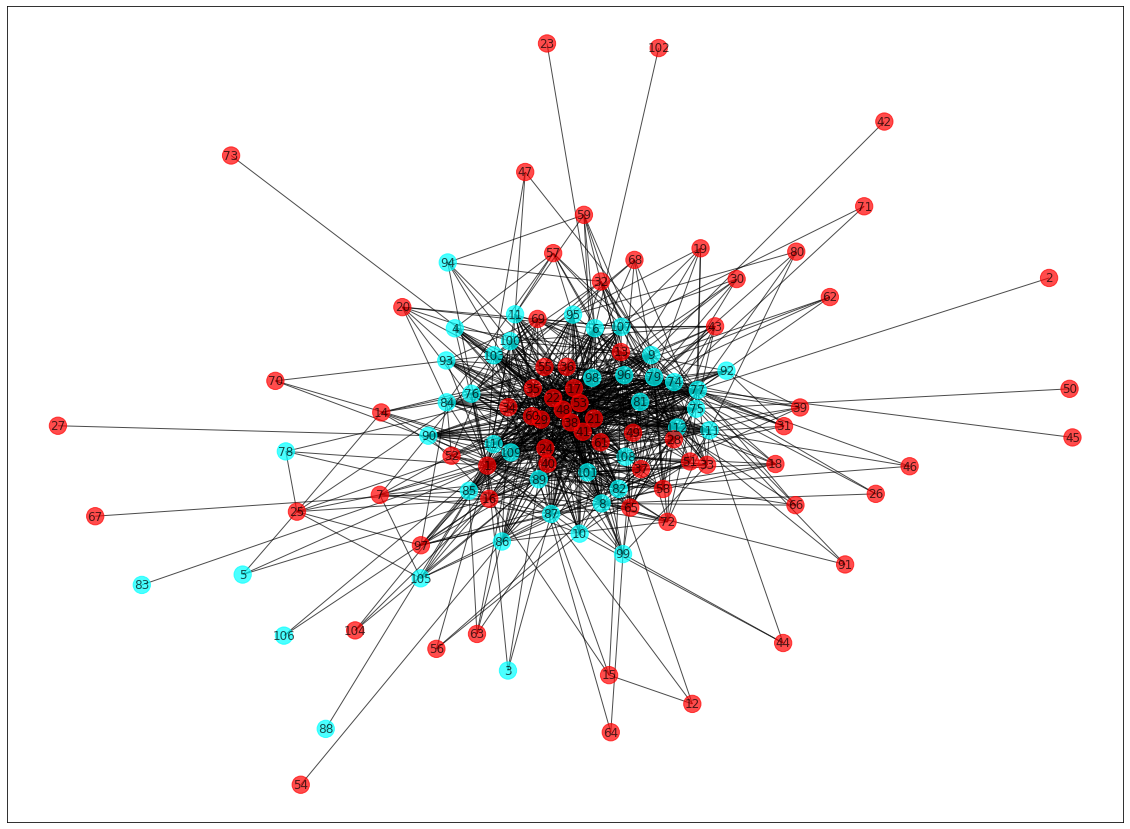

In [32]:
visualisee(A,G112,G122)